# **AMAZON FOOD REVIEWS EXPLORATORY DATA ANALYSIS**

## 1. Introduction

In this project, a database will be opened and cleaned and simplyfied to finally be analyzed and plot.

The database takes too much space so i will share here the link instead of store it in the github directory. If you download de database without changing its name you will able to repeat the same steps without problems. I will explain each step as clearly as possible. Finally, I hope you learn from this project. It will be in sqlite format to make it more fun.

## 2. Downloading the data

You can find the data in kaggle following this link:

https://www.kaggle.com/datasets/akhileshburungale/amazon-food-reviews

In this page you can obtain a lot of data sets in order to practice your skills, it's only required to create a free account.

## 3. Cleaning the data

In this section the data will be cleaned using python. Firstly we are going to import necessary frameworks.

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns

/home/lonely-wolf/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


The database will be initialized and stored into a pd.DataFrame().

In [2]:
conn = sql.connect('database.sqlite')
df = pd.read_sql_query('SELECT * FROM reviews' , conn)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


It can be observed that the data is relatively clean, however, it is possible to improve it. changes which will be realized:
- The time transcurred since review's creation is in seconds as int values, they will be transformed into a pd.datetime. We will suppose we are doing notebook with that time, if we are going to doing the notebook in present of the lector, add the time variation since the list was last updated to now.
- We can see the HelpfullnessNumerator and Denominator have same values (the data could be wrong recompiled) so we will drop these columns.

In [3]:
templist = [df['HelpfulnessNumerator']-df['HelpfulnessDenominator']!=0]
df['Time'] = pd.to_timedelta(df['Time'], unit='s')
df.drop(['HelpfulnessDenominator','HelpfulnessNumerator'], axis=1, inplace=True)
df

,Id,ProductId,UserId,ProfileName,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,15091 days,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,15590 days,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,14109 days,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,15138 days,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,15634 days,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,5,15042 days,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,2,15408 days,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",5,15391 days,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",5,15412 days,Favorite Training and reward treat,These are the BEST treats for training and rew...


Now, we can continue.

## 4. Looking for the Data and Plotting Useful Information

### 4.1. What is the top 15 best rated and top 15 underrated products in the database?

Suppose the company want to know which products are best valued in order to make a change in its sales method. What can we do?

Firstly we are going to make a Serie with the desired data, we group the data by ProductID and we store the mean of rating of each product sort by this value descending. In order to get more reliable data, only we get data with minimun 200 number of reviews.

In [4]:
score_df = df.groupby(['ProductId']).agg({'Score': 'mean', 'ProductId': 'size'}).sort_values(by='Score',ascending=False)
score_df = score_df.rename(columns={'ProductId': 'NumReviews'})
score_df = score_df[score_df['NumReviews']>200]
score_df_top, score_df_tail = score_df[:15], score_df[-15:]
score_df_top, score_df_tail

(               Score  NumReviews
 ProductId                       
 B000NMJWZO  4.881919         542
 B003QDRJXY  4.837121         264
 B000GAT6NG  4.802057         389
 B001E8DHPW  4.802057         389
 B004EAGP74  4.802057         389
 B001EQ5JLE  4.754717         212
 B001EO5Q64  4.746032         567
 B003B3OOPA  4.739968         623
 B000V17MLS  4.704036         223
 B001ELL60W  4.693141         277
 B001EO5U3I  4.682584         356
 B008J1HO4C  4.682584         356
 B005BRHVD6  4.665179         224
 B000HDK0DC  4.656827         271
 B004P4POZ8  4.642857         238,
                Score  NumReviews
 ProductId                       
 B006MONQMC  3.380855         491
 B0012NUVN0  3.354086         257
 B0012V1G0Y  3.354086         257
 B0009YJ4CW  3.354086         257
 B005A1LJ04  3.352459         244
 B004U49QU2  3.334471         293
 B004U43ZO0  3.249042         261
 B005K4Q1RW  3.143426         251
 B004TJF3BE  3.143426         251
 B009RB4GO4  3.143426         251
 B005K4Q1W2  

Now we are going to create an function

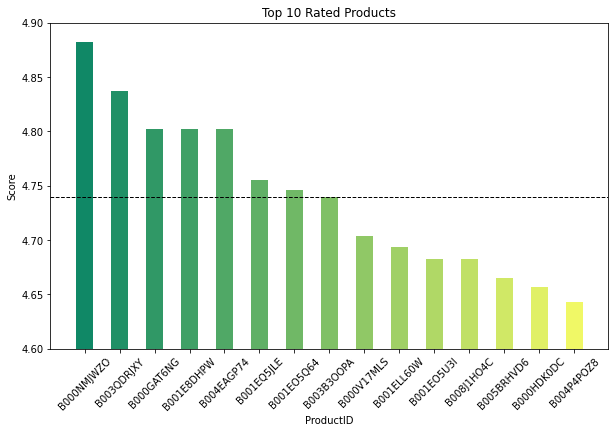

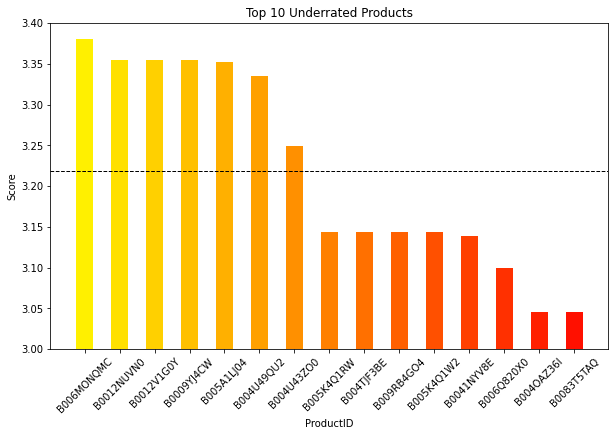

In [5]:
def top_rated_products(save_png=False):
    colors = sns.color_palette('summer', n_colors=len(score_df_top)) #Color Palette
    plt.figure(figsize=(10,6)) # Creating a Fig
    bars = plt.bar(score_df_top.index, score_df_top['Score'], color=colors, width=0.5, linewidth=0, edgecolor='black') # Plotting each ProductID
    plt.axhline(np.mean(list(score_df_top['Score'])), color='black', linestyle='--', linewidth=1)
    plt.xticks(rotation=45) # Making readable ProductIDs
    plt.ylim(4.6, 4.9) # Making limits to see better diferences between products
    plt.title('Top 10 Rated Products')
    plt.xlabel('ProductID')
    plt.ylabel('Score')
    if save_png:
        plt.savefig('histograma_scores_top.png', bbox_inches='tight')
    return plt.show()

def top_underrated_products(save_png=False):
    colors = sns.color_palette('autumn', n_colors=len(score_df_tail))[::-1] #Color Palette
    plt.figure(figsize=(10,6)) # Creating a Fig
    bars = plt.bar(score_df_tail.index, score_df_tail['Score'], color=colors, width=0.5, linewidth=0) # Plotting each ProductID
    plt.axhline(np.mean(list(score_df_tail['Score'])), color='black', linestyle='--', linewidth=1)
    plt.xticks(rotation=45) # Making readable ProductIDs
    plt.ylim(3, 3.4) # Making limits to see better diferences between products
    plt.title('Top 10 Underrated Products')
    plt.xlabel('ProductID')
    plt.ylabel('Score')
    if save_png:
        plt.savefig('histograma_scores_tail.png', bbox_inches='tight')
    return plt.show()

top_rated_products()
top_underrated_products()

Now with this data it is possible to make different decisions. For example:
- The _Highest Rated Products_ can tell us which ones the company should show more of (it would be useful to know the country where most of the ratings come from).
  
- Knowing the _worst rated products_ we can look for the root of the problem, it could be bad marketing like trying to appeal to the wrong audience, it could be poor quality/cost of the product or on the other hand the reason could be a bad shipping company.

Furthermore, we assume that for x number of reviews, the product sells at least x times.

### 4.2. What consumers are most active in the platform?

Now, to maintain recurring consumer purchases, the Company wants to discover the most active consumers on the website, whose rating exceeds the overall rating average to reward them and incentivize them to purchase new products.

We are going to follow similar steps to the previous question, to do this, we group the data by user ID and classify them by number of reviews in descending order. If the user's average score exceeds the general average, they are stored in the ranking. Finally, the 16 best are selected.

In [6]:
user_df = df.groupby(['UserId']).agg({'Score': 'mean', 'UserId': 'size'})
user_df = user_df.rename(columns={'UserId': 'NumReviews'}).sort_values(by='NumReviews',ascending=False)
user_df_head = user_df[user_df['NumReviews']>50]
user_df_head = user_df_head[user_df_head['Score']>np.mean(list(df['Score']))]
user_df_head = user_df[:16]
user_df_head

,Score,NumReviews
UserId,,
A3OXHLG6DIBRW8,4.535714,448
A1YUL9PCJR3JTY,4.494062,421
AY12DBB0U420B,4.647815,389
A281NPSIMI1C2R,4.841096,365
A1Z54EM24Y40LL,4.453125,256
A1TMAVN4CEM8U8,4.833333,204
A2MUGFV2TDQ47K,3.751244,201
A3TVZM3ZIXG8YW,1.000000,199
A3PJZ8TU8FDQ1K,4.601124,178


Then we are going to make a circular graph to see information, represent the quantity of reviews respect of the total is irrelevant due to the total will cover all the plot, instead of that, we are going to represent the average number of reviews per users with the number of reviews of each top user.

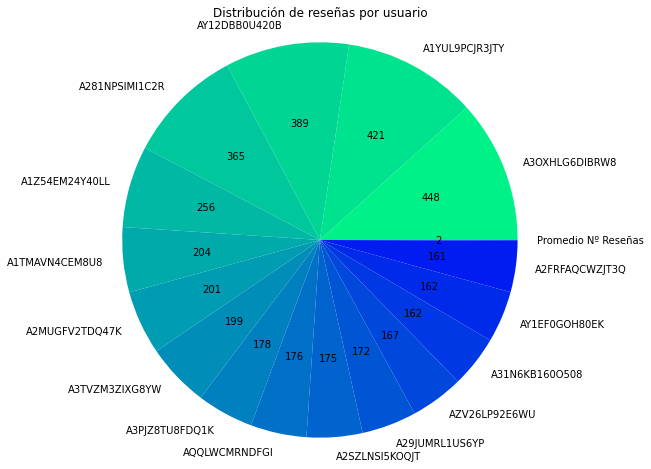

In [7]:
def users_pie():
    AvgTopUsers = user_df_head['NumReviews'].mean()
    # Se obtienen los datos de los usuarios principales
    top_users_reviews = user_df_head['NumReviews'].tolist()
    # Se calcula el promedio de reseñas por usuario
    avg_num_reviews = user_df['NumReviews'].mean()
    # Se crea una lista con el número promedio de reseñas y se agrega al final de la lista de reseñas de los usuarios principales
    data = top_users_reviews + [avg_num_reviews]
    # Se obtiene una lista de etiquetas para los usuarios principales y una etiqueta para el promedio
    labels = list(user_df_head.index) + ['Promedio Nº Reseñas']
    # Se crea el gráfico circular
    plt.figure(figsize=(10, 8))
    colors = sns.color_palette("winter", len(data))[::-1]
    # Se crea el gráfico circular con colores personalizados
    plt.pie(data, labels=labels, autopct=lambda p: '{:.0f}'.format(p * sum(data) / 100), colors=colors)
    plt.title('Distribución de reseñas por usuario')
    plt.axis('equal')
    return plt.show()

users_pie()

# 5 Conclusion

Finally, this data is sent to the marketing team so that they can make the relevant decisions to improve the company.